In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [78]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")

In [79]:
dowjones = dowjones_closing['Close']

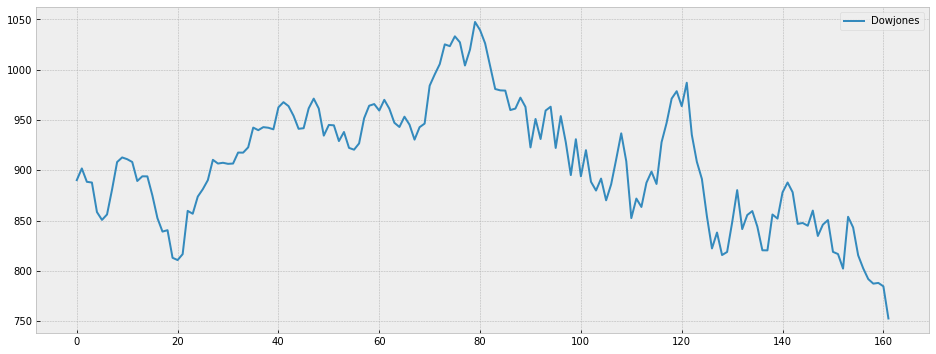

In [80]:
#исходный начальный график
plt.style.use('bmh')
plt.figure(figsize = (16,6))
plt.plot(dowjones, label = 'Dowjones')
plt.legend()
plt.show()

In [137]:
#Функция для оценнки стационарности ряда по Дики-Фуллеру
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    dfoutput['The maximized information criterion'] = dftest[5]
    print(dfoutput)
    
#Отрисовка временного ряда с тестом Дики-Фулерра
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [19]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [7]:
from arch import arch_model

#### Для реализации GARCH ряд необходимо сделать стационарным, исходя из параметров ARIMA (p = 2, d = 2, q = 3), полученных в предыдущей работе, продифферинцируем ряд со сдвигом два.

In [138]:
dowjones_st = dowjones.diff(2).dropna()
params = (2,2,3)

In [139]:
am = arch_model(dowjones_st, p = params[0], o = params[1], q = params[2], dist = 't')
res = am.fit(update_freq = 5, disp = 'off')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GJR-GARCH Model Results                       
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -752.488
Distribution:      Standardized Student's t   AIC:                           1524.98
Method:                  Maximum Likelihood   BIC:                           1555.73
                                              No. Observations:                  160
Date:                      Sat, Jan 15 2022   Df Residuals:                      159
Time:                              14:54:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3197      2.331     -0.137      0.891 [ -4.889,  4.250]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         68.3302     64.631      1.057      0.290 [-58.344,1.950e+02]
alpha[1]       0.0644      0.145      0.443      0.658   [ -0.220,  0.349]
alpha[2]       0.0186      0.115      0.162      0.871   [ -0.206,  0.243]
gamma[1]       0.1064      0.178      0.598      0.550   [ -0.242,  0.455]
gamma[2]      -0.0186  6.438e-02     -0.289      0.772   [ -0.145,  0.108]
beta[1]    8.7269e-16      0.450  1.940e-15      1.000   [ -0.882,  0.882]
beta[2]        0.7464      0.181      4.132  3.596e-05   [  0.392,  1.100]
beta[3]        0.0368      0.405  9.096e-02      0.928   [ -0.757,  0.831]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
nu           202.5520    223.658      0.906      0.365 [-2.358e+02,6.409e+02]
=============================================================================

Covariance estimator: robust
"""

Results of Dickey-Fuller Test:
Test Statistic                           -4.846033
p-value                                   0.000044
Lags Used                                 9.000000
Number of Observations Used             150.000000
Critical Value (1%)                      -3.474715
Critical Value (5%)                      -2.881009
Critical Value (10%)                     -2.577151
The maximized information criterion    1304.065297
dtype: float64


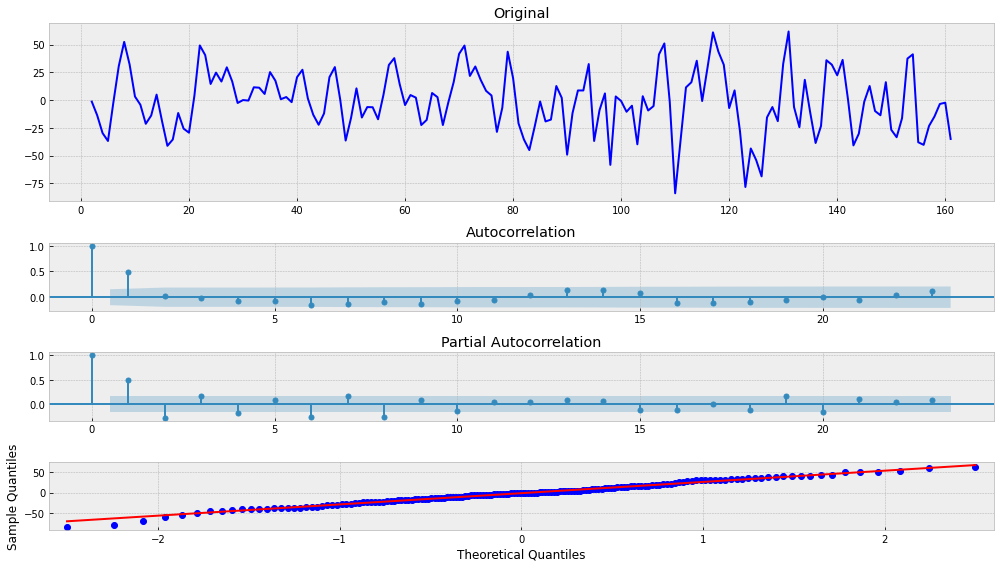

In [140]:
tsplot(res.resid)

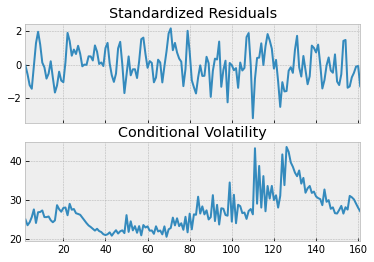

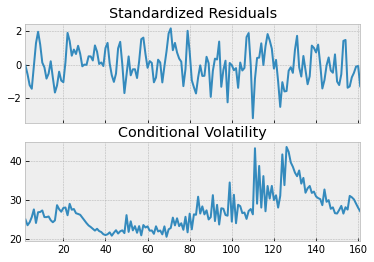

In [141]:
#график остатков
res.plot()